## Project Overview
Saat ini, banyak perusahaan yang hadir dalam bentuk aplikasi mobile. Pada umumnya, perusahaan-perusahaan ini menyediakan produk atau layanan gratis di dalam aplikasi mobile mereka dengan harapan dapat mengubah pelanggan menjadi anggota berbayar. Beberapa contoh produk berbayar tersebut, yang berasal dari versi gratisnya, antara lain YouTube Red, Pandora Premium, Audible Subscription, dan You Need a Budget. Mengingat upaya pemasaran tidaklah gratis, maka perusahaan-perusahaan ini perlu mengetahui dengan pasti kepada siapa mereka harus mengarahkan penawaran dan promosi mereka.

Dalam konteks ini, pasar yang menjadi target adalah para pelanggan yang menggunakan produk gratis dari perusahaan tersebut melalui aplikasi mobile. Produk yang ditawarkan dalam bentuk keanggotaan berbayar umumnya memberikan fitur-fitur tambahan dan penyempurnaan dari produk gratis yang sudah ada, serta menambahkan fitur-fitur baru yang menarik. Sebagai contoh, YouTube Red memungkinkan pengguna untuk tetap mendengarkan video meskipun mereka keluar dari aplikasi.

Tujuan dari model ini adalah untuk memprediksi pengguna mana yang kemungkinan besar tidak akan berlangganan keanggotaan berbayar, sehingga perusahaan dapat mengarahkan upaya pemasaran yang lebih besar kepada mereka dalam upaya "mengonversi" mereka menjadi pengguna berbayar. Dengan demikian, perusahaan dapat mengoptimalkan sumber daya dan strategi pemasaran mereka dengan lebih efektif.

### Import Library dan Dataset:

- Mengimpor library yang diperlukan seperti numpy, pandas, matplotlib, dan seaborn.
- Mengimpor dataset dari file 'data_fintech.csv' menggunakan fungsi pd.read_csv().

In [1]:
# Mengimpor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataku = pd.read_csv('data_aplikasi.csv')

In [7]:
top_screens = pd.read_csv('top_screens.csv')

### Pengolahan Data:

- Melakukan ringkasan data menggunakan fungsi describe() dan dtypes untuk memahami statistik deskriptif dan tipe data dari setiap kolom.
- Melakukan preprocessing data:
- Mengubah tipe data kolom 'screen_list' menjadi string dan menambahkan tanda koma (',') pada setiap nilai.
- Menghitung jumlah koma (',') dalam kolom 'screen_list' dan menyimpannya dalam kolom 'num_screens'.
- Menghilangkan kolom 'numscreens'.
- Memperbaiki format kolom 'hour' dengan memotong karakter pertama dan kedua menggunakan fungsi str.slice() dan mengubahnya menjadi tipe data integer.

In [3]:
dataku.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
# Ringkasan data
ringkasan = dataku.describe()
tipe_data = dataku.dtypes

In [5]:
ringkasan

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
tipe_data

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [8]:
# Ringkasan data
ringkasan1 = top_screens.describe()
tipe_data1 = top_screens.dtypes

In [9]:
tipe_data1

Unnamed: 0      int64
top_screens    object
dtype: object

In [10]:
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [11]:
# Merevisi kolom num_screens
dataku['screen_list'] = dataku.screen_list.astype(str) + ','
dataku['num_screens'] = dataku.screen_list.str.count(',')
dataku.drop(columns=['numscreens'], inplace=True)
dataku.head()

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,num_screens
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",0,0,0,NaN,0,13
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,11
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan,",0,1,0,NaN,1,3
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",0,0,1,2013-07-05 16:11:49.513,0,17
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",0,0,1,2013-02-26 18:56:37.841,1,19


In [12]:
# Cek kolom hour
dataku.hour[1]
dataku.hour = dataku.hour.str.slice(1,3).astype(int)

In [13]:
# Mendefinisikan variabel khusus numerik
dataku_numerik = dataku.drop(columns=['user','first_open','screen_list',
                                      'enrolled_date'], inplace=False)

### Visualisasi Data:

- Membuat histogram untuk setiap kolom data numerik menggunakan library seaborn dan matplotlib.
- Membuat correlation matrix antara variabel numerik dengan target 'enrolled' menggunakan fungsi corrwith() dan corr().
- Menampilkan correlation matrix menggunakan heatmap dengan fungsi sns.heatmap().

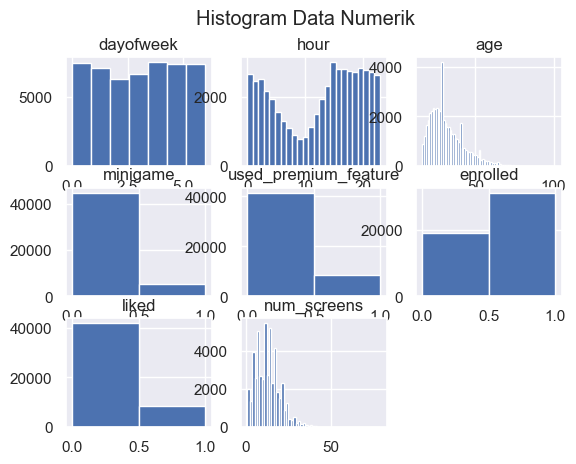

In [14]:
# Membuat histogram
sns.set()
plt.suptitle('Histogram Data Numerik')
for i in range(0, dataku_numerik.shape[1]):
    plt.subplot(3,3,i+1)
    figure = plt.gca()
    figure.set_title(dataku_numerik.columns.values[i])
    jumlah_bin = np.size(dataku_numerik.iloc[:,i].unique())
    plt.hist(dataku_numerik.iloc[:,i], bins=jumlah_bin)

<AxesSubplot:title={'center':'Korelasi variabel terhadap keputusan Enrolled'}>

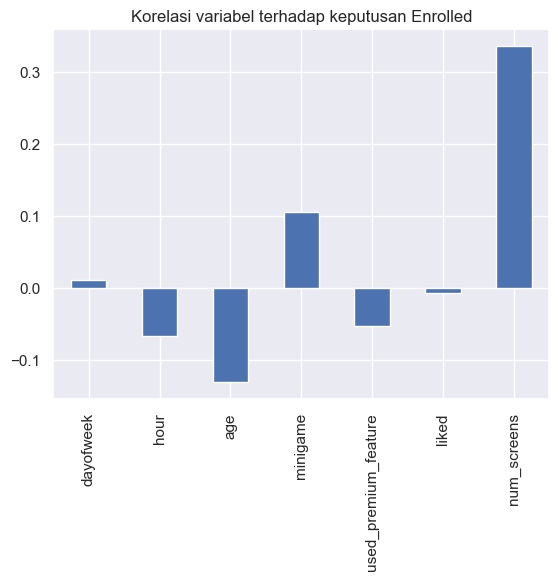

In [15]:
# Membuat correlation matrix
korelasi = dataku_numerik.drop(columns=['enrolled'], inplace=False).corrwith(dataku_numerik.enrolled)
korelasi.plot.bar(title='Korelasi variabel terhadap keputusan Enrolled')

<AxesSubplot:>

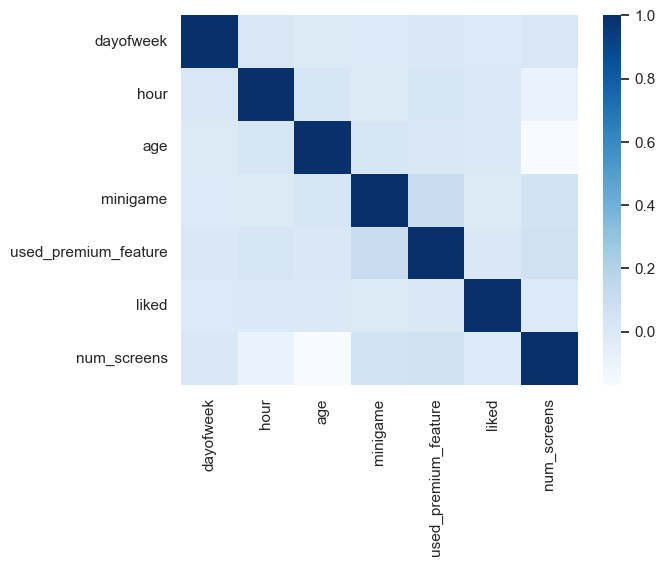

In [16]:
matriks_korelasi = dataku_numerik.drop(columns=['enrolled'], inplace=False).corr()
sns.heatmap(matriks_korelasi, cmap='Blues')

In [17]:
mask = np.zeros_like(matriks_korelasi, dtype=bool)
mask[np.triu_indices_from(mask)] = True

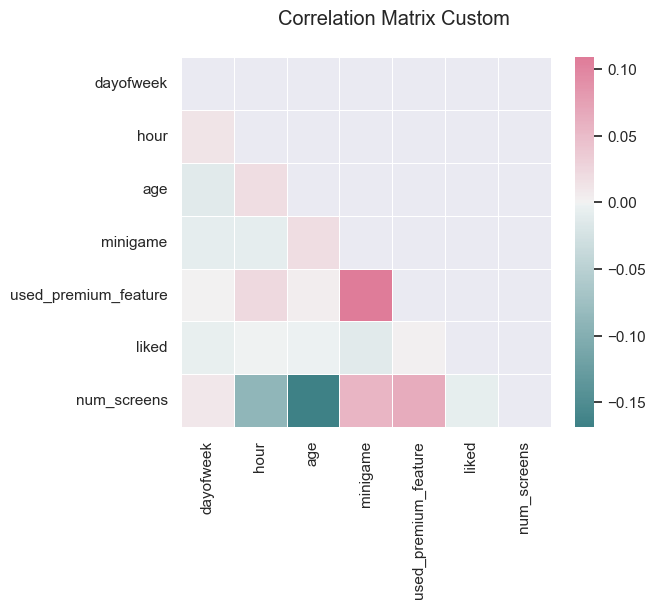

In [18]:
# Membuat correlation matrix dengan heatmap custom
ax = plt.axes()
cmap_ku = sns.diverging_palette(200, 0, as_cmap=True)
sns.heatmap(matriks_korelasi, cmap=cmap_ku, mask=mask, 
            linewidths=0.5, center=0, square=True)
ax = plt.suptitle('Correlation Matrix Custom')

Kesimpulan dari grafik di atas adalah sebagai berikut:

1. Day of the Week: Dapat dilihat bahwa tidak ada korelasi yang signifikan antara hari dalam seminggu dengan variabel respons. Hal ini menunjukkan bahwa hari dalam seminggu tidak memiliki pengaruh langsung terhadap keputusan pengguna untuk berlangganan.

2. Hour: Korelasi antara jam dan variabel respons adalah negatif. Artinya, semakin awal jamnya, semakin tinggi kemungkinan seseorang akan berlangganan. Ini menunjukkan bahwa pengguna yang membuka aplikasi pada jam-jam awal cenderung lebih tertarik untuk menjadi pelanggan.

3. Age: Korelasi antara usia dan variabel respons juga negatif. Ini mengindikasikan bahwa generasi yang lebih muda memiliki kecenderungan yang lebih tinggi untuk berlangganan dibandingkan dengan generasi yang lebih tua.

4. Numscreens: Variabel ini menunjukkan bahwa semakin banyak layar yang dilihat oleh pengguna, semakin besar kemungkinan mereka akan menjadi pelanggan. Hal ini menunjukkan bahwa pengguna yang aktif dan terlibat dengan produk memiliki peluang yang lebih tinggi untuk beralih ke langganan berbayar.

5. Minigame: Korelasi antara fitur minigame dan variabel respons adalah positif. Ini menunjukkan bahwa minigame memiliki efek positif dalam mendorong pengguna untuk berlangganan.

6. Used Premium Feature: Korelasi antara penggunaan fitur premium dan variabel respons adalah negatif. Hal ini menunjukkan bahwa keputusan pengguna untuk tidak berlangganan setelah menggunakan fitur premium mungkin disebabkan oleh persepsi bahwa harga yang dikenakan tidak sebanding dengan manfaat yang diperoleh.

7. Likes: Menariknya, korelasi antara jumlah "like" dan respons pengguna tidak signifikan. Salah satu alasan mungkin adalah karena jumlah "like" cenderung acak dan tidak memiliki pengaruh langsung pada keputusan pengguna untuk berlangganan.

Dengan demikian, informasi ini memberikan pemahaman tentang faktor-faktor yang mempengaruhi keputusan pengguna dalam berlangganan dan bagaimana variabel-variabel tersebut saling terkait.

### Feature Engineering:

- Melakukan proses parsing pada kolom 'first_open' dan 'enrolled_date' menggunakan library dateutil dan mengubahnya menjadi format datetime.
- Membuat histogram untuk melihat selisih waktu antara pengguna terdaftar dengan pengguna pertama kali membuka aplikasi.
- Melakukan filtering pada nilai 'enrolled' menjadi 0 jika selisih waktu lebih dari 48 jam.
- Mengimpor top screens dari file 'top_screens.csv' dan menyimpannya dalam array 'top_screens'.
- Membuat kolom baru untuk setiap top screen dan menghitung jumlah kemunculan setiap top screen.
- Menggabungkan beberapa layar yang sama untuk proses funneling dengan menjumlahkan kolom-kolom yang berkaitan.
- Menghapus kolom-kolom yang redundan dan menentukan variabel dependen.

In [19]:
# FEATURE ENGINEERING
# proses parsing
from dateutil import parser
dataku.first_open = [parser.parse(i) for i in dataku.first_open]
dataku.enrolled_date = [parser.parse(i) if isinstance(i, str) else i for i in dataku.enrolled_date]
dataku['selisih'] = (dataku.enrolled_date - dataku.first_open).astype('timedelta64[h]')

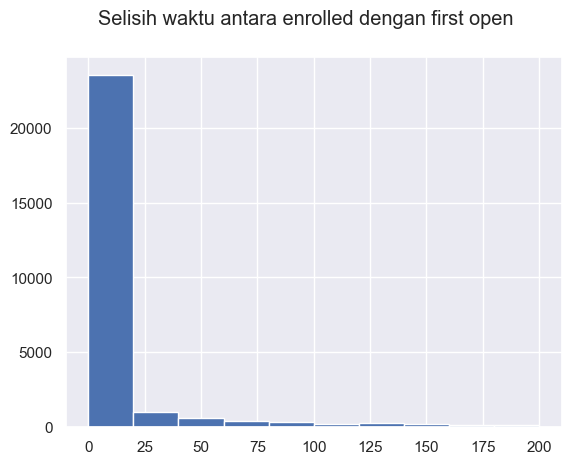

In [20]:
# Membuat plot histogram dataku.selisih
plt.hist(dataku.selisih.dropna(), range=[0,200])
plt.suptitle('Selisih waktu antara enrolled dengan first open')
plt.show()

Dari grafik di atas, kita dapat melihat bahwa sebagian besar pelanggan berlangganan dalam 5 jam pertama penggunaan aplikasi. Namun, untuk membuat batasan waktu (waktu setelah itu kita dapat mengatakan bahwa kemungkinan seorang pengguna untuk berlangganan hampir nol), untuk pengujian sistem secara real-time ini sangat baik.

Seperti yang dapat kita lihat dalam grafik kedua, ketika waktu berlalu, jumlah pelanggan yang baru menurun sehingga nilai terbaik untuk batasan waktu adalah 48 jam (Kita juga memilih 48 jam karena mewakili dua hari penuh).

In [21]:
# Memfilter nilai selisih > 48 jam, kita mengubah nilai enrolled menjadi 0 ketika selisih atau jumlah jam penggunaan melebihi 48.
dataku.loc[dataku.selisih>48, 'enrolled'] = 0

In [22]:
# Mengimpor top screens
top_screens = pd.read_csv('top_screens.csv')
top_screens = np.array(top_screens.loc[:,'top_screens'])

In [23]:
# Membuat cadangan data
dataku2 = dataku.copy()

In [24]:
# Membuat kolom untuk setiap top_screens
for layar in top_screens:
    dataku2[layar] = dataku2.screen_list.str.contains(layar).astype(int)

In [25]:
for layar in top_screens:
    dataku2['screen_list'] = dataku2.screen_list.str.replace(layar+',', '')

In [26]:
# Item non top_screens di screen_list
dataku2['lainnya'] = dataku2.screen_list.str.count(',')

In [27]:
top_screens.sort()

Ada beberapa tampilan yang sangat mirip dan mungkin sangat berkorelasi satu sama lain, oleh karena itu kita harus menanganinya sebelum melanjutkan. Metode ini disebut funneling. Tampilan seperti Saving1, Saving2, dan lainnya dapat dikelompokkan sebagai satu kesatuan.

In [28]:
# Proses penggabungan beberapa screen yang sama (Funneling)
layar_loan = ['Loan',
              'Loan2',
              'Loan3',
              'Loan4']
dataku2['jumlah_loan'] = dataku2[layar_loan].sum(axis=1)
dataku2.drop(columns=layar_loan, inplace=True)

In [29]:
layar_saving = ['Saving1',
                'Saving2',
                'Saving2Amount',
                'Saving4',
                'Saving5',
                'Saving6',
                'Saving7',
                'Saving8',
                'Saving9',
                'Saving10']
dataku2['jumlah_saving'] = dataku2[layar_saving].sum(axis=1)
dataku2.drop(columns=layar_saving, inplace=True)


In [30]:
layar_credit = ['Credit1',
                'Credit2',
                'Credit3',
                'Credit3Container',
                'Credit3Dashboard']
dataku2["jumlah_kredit"] = dataku2[layar_credit].sum(axis=1)
dataku2.drop(columns=layar_credit, inplace=True)

In [31]:
layar_cc = ['CC1',
            'CC1Category',
            'CC3']
dataku2['jumlah_cc'] = dataku2[layar_cc].sum(axis=1)
dataku2.drop(columns=layar_cc, inplace=True)

In [36]:
# Mendefinisikan var dependen
var_enrolled = np.array(dataku2['enrolled'])

In [37]:
# Menghilangkan beberapa kolom yang redundan
dataku2.drop(columns=['first_open', 'screen_list','enrolled',
                        'enrolled_date', 'selisih'], inplace=True)

### Pembagian Training dan Test Set:

- Membagi data menjadi training set dan test set menggunakan fungsi train_test_split().
- Menyimpan user ID untuk training set dan test set.
- Menghilangkan kolom 'user' dari X_train dan X_test.
- Merubah X_train dan X_test menjadi numpy array.
- Melakukan preprocessing dengan standardisasi menggunakan StandardScaler.
- Menghilangkan variabel kosong dari X_train dan X_test.

In [38]:
# Membagi menjadi training dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataku2, var_enrolled, 
                                                    test_size=0.2,
                                                    random_state=111)

In [39]:
# Menyimpan user ID untuk training dan test set
train_id = np.array(X_train['user'])
test_id = np.array(X_test['user'])

In [40]:
# Menghilangkan kolom user di X_train dan X_test
X_train.drop(columns=['user'], inplace=True)
X_test.drop(columns=['user'], inplace=True)

In [41]:
# Merubah X_train dan X_test menjadi numpy array (test set sudah berbentuk array jadi tidak perlu)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [42]:
# Preprocessing Standardization (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [43]:
# Menghilangkan variabel kosong
X_train = np.delete(X_train, 27, 1)
X_test = np.delete(X_test, 27, 1)

### Training

- Menggunakan algoritma berbagai algoritma untuk membangun model prediktif.
- Melakukan fitting model menggunakan training set dengan fungsi fit().
- Mengevaluasi model dengan menggunakan confusion matrix, classification report, dan akurasi.

In [45]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='liblinear',
                                penalty='l1')
classifier.fit(X_train, y_train)

# Memprediksi test set
y_pred = classifier.predict(X_test)

# Mengevaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
# Menggunakan accuracy_score
evaluasi = accuracy_score(y_test, y_pred)
print('Akurasi:{:.2f}'.format(evaluasi*100))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      5037
           1       0.76      0.76      0.76      4963

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

Akurasi:76.34


In [93]:
from sklearn.ensemble import RandomForestClassifier

# Membangun model Random Forest
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

# Memprediksi test set
y_pred = classifier.predict(X_test)

# Evaluasi model
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi: {:.2f}%'.format(accuracy * 100))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      5037
           1       0.78      0.76      0.77      4963

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Akurasi: 77.55%


In [94]:
from sklearn.svm import SVC

# Membangun model SVM
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Memprediksi test set
y_pred = classifier.predict(X_test)

# Evaluasi model
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi: {:.2f}%'.format(accuracy * 100))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      5037
           1       0.71      0.80      0.75      4963

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Akurasi: 73.81%


In [97]:
from sklearn.ensemble import GradientBoostingClassifier

# Membangun model Gradient Boosting
classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

# Memprediksi test set
y_pred = classifier.predict(X_test)

# Evaluasi model
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi: {:.2f}%'.format(accuracy * 100))


              precision    recall  f1-score   support

           0       0.77      0.80      0.78      5037
           1       0.79      0.75      0.77      4963

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Akurasi: 77.61%


In [99]:
from sklearn.neural_network import MLPClassifier

# Membangun model Neural Networks
classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0)
classifier.fit(X_train, y_train)

# Memprediksi test set
y_pred = classifier.predict(X_test)

# Evaluasi model
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi: {:.2f}%'.format(accuracy * 100))


              precision    recall  f1-score   support

           0       0.75      0.78      0.77      5037
           1       0.77      0.74      0.75      4963

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

Akurasi: 76.05%


C:\Users\TUF-RYZEN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
from sklearn.naive_bayes import GaussianNB

# Membangun model Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Memprediksi test set
y_pred = classifier.predict(X_test)

# Evaluasi model
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi: {:.2f}%'.format(accuracy * 100))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      5037
           1       0.72      0.69      0.71      4963

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

Akurasi: 71.60%
